In [2]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]


In [5]:
import pandas as pd
from pathlib import Path

data_path = Path("../data/starter_data.csv")
df = pd.read_csv(data_path)

display(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


None

,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


In [8]:
# .describe() 
summary_stats = df.describe()
print(summary_stats)

grouped = df.groupby('category')

grouped_stats = grouped['value'].agg(['mean', 'median', 'std', 'count'])
print(grouped_stats)


           value
count  10.000000
mean   17.600000
std     7.381659
min    10.000000
25%    12.250000
50%    14.500000
75%    23.250000
max    30.000000
               mean  median       std  count
category                                    
A         11.500000    11.5  1.290994      4
B         15.666667    15.0  2.081666      3
C         27.666667    28.0  2.516611      3


In [12]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 17.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [13]:
from pathlib import Path
import matplotlib.pyplot as plt

processed_dir = Path("../data/processed")
processed_dir.mkdir(parents=True, exist_ok=True)

Matplotlib is building the font cache; this may take a moment.


In [14]:
summary_path = processed_dir / "summary.csv"
summary_stats.to_csv(summary_path)
print("Summary saved to:", summary_path.resolve())


Summary saved to: /Users/shiweixu/bootcamp_Shiwei_Xu/homework/homework-stage03/data/processed/summary.csv


Plot saved to: /Users/shiweixu/bootcamp_Shiwei_Xu/homework/homework-stage03/data/processed/value_hist.png


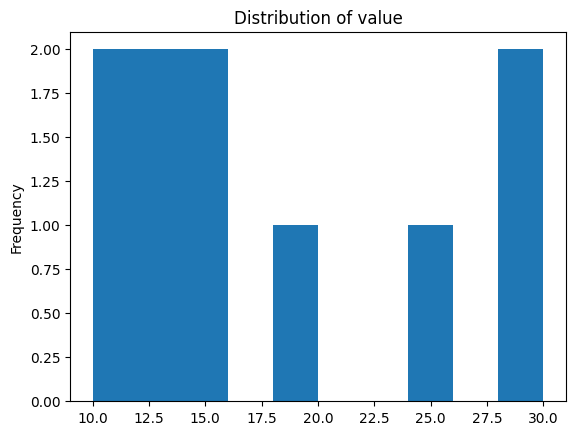

In [15]:
plt.figure()
df['value'].plot(kind='hist', bins=10, title="Distribution of value")
plot_path = processed_dir / "value_hist.png"
plt.savefig(plot_path, dpi=150, bbox_inches="tight")
print("Plot saved to:", plot_path.resolve())

In [23]:
def get_summary_stats(df, group_col=None):
    
    summary_stats = df.describe()
    
    grouped_stats = None
    if group_col and group_col in df.columns:
        num_cols = df.select_dtypes(include='number').columns
        grouped_stats = df.groupby(group_col)[num_cols].agg(['mean', 'median', 'std', 'count'])
    
    return summary_stats, grouped_stats

In [24]:
summary, grouped = get_summary_stats(df, group_col='category')

print("Summary stats:")
print(summary)

if grouped is not None:
    print("\nGrouped stats:")
    print(grouped)

Summary stats:
           value
count  10.000000
mean   17.600000
std     7.381659
min    10.000000
25%    12.250000
50%    14.500000
75%    23.250000
max    30.000000

Grouped stats:
              value                       
               mean median       std count
category                                  
A         11.500000   11.5  1.290994     4
B         15.666667   15.0  2.081666     3
C         27.666667   28.0  2.516611     3
